# Dimensionality Reduction on <font color=gray>Non-Linear Data</font> using <font color=red>Manifold Learning Techniques</font>

We apply __Manifold Learning Techniques__ to reduce the number of features. We've already baselined with original set of features <a href='http://localhost:8888/notebooks/Exercises/Ex_MachineLearning/Pluralsight/Reducing%20Complexity%20in%20data/Baseline%20Regression%20Model.ipynb'/>Baseline Regression Model</a>. After reducing the features using MDS, we fit a regression model to the data and compare with baseline.

<font color=red>__Manifold Learning__</font>
- Manifold Learning refers to the __class of algorithms__ in __dimensionality reduction__ which are based on Manifold Hypothesis.
- Manifold Learning technique works on the principle that __data__ in the real world __in high dimensionality__ is __simpler__ in shape in __lower dimensions__ which is twisted, turned and rolled to the higher dimensions.

__Manifold Learning Techniques__:
- Multidimensional Scaling(MDS)
- Spectral Embedding
- t-distributed Stochastic Neighbor Embedding (t-SNE)
- Isomap
- Locally Linear Embedding
- kernel PCA

<img src='Data/Manifold Learning Algorithms.png' width=500/>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from mpl_toolkits import mplot3d

In [2]:
# n is no. of data points

def generate_manifold(method, n=1500):
    X, color = method(n_samples = n)
    
    print('Shape of X: ', X.shape)
    print('Shape of color: ', color.shape)
    print('Sample X:\n')
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    ax = plt.subplots(figsize=(8, 4))
    ax = plt.axes(projection = '3d')
    
    ax.scatter3D(X[0], X[1], X[2], c = color, cmap=plt.cm.Spectral)
    
    return X, color

Shape of X:  (1500, 3)
Shape of color:  (1500,)
Sample X:

              0          1          2
972   -2.859258   6.183972   7.695717
212   -8.516688  16.327518   3.127658
1484  -9.413552  15.715772  -2.094162
83     2.170162   1.888401 -10.978295
32     4.956407  13.415916  -2.917253
1039   5.504683   9.419683  12.572168
1379  -9.399690  10.601251   0.213141
489   12.209494   7.662410  -2.129041
906   -8.954334  16.356519   2.091402
526    4.464026   5.299098  13.066453


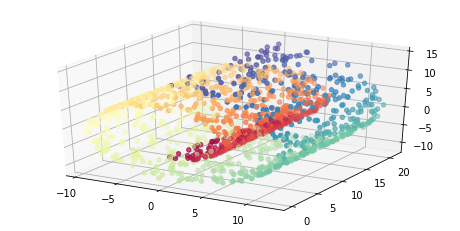

In [3]:
X, color = generate_manifold(datasets.samples_generator.make_swiss_roll)

In [4]:
def apply_manifold_learning(X, method):
    X = method.fit_transform(X)
    
    print('New shape of X: ', X.shape)
    print('Sample X:\n')
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    plt.subplots(figsize=(8, 8))
    plt.axis('equal')
    
    plt.scatter(X[0], X[1], c = color, cmap=plt.cm.Spectral)
    plt.xlabel('X[0]')
    plt.ylabel('X[1]')
    
    return method

<font color='red'>__Multidimensional Scaling(MDS)__</font>
- Reduces dimensionality while preserving distance between instances

New shape of X:  (1500, 2)
Sample X:

             0         1
201   0.433585 -0.135734
801  -0.238830  0.364197
1414 -0.432082 -0.615134
132   0.172974  0.397820
83    0.293582 -0.287570
622  -0.279183 -0.408197
970  -0.444051 -0.156430
810   0.368944 -0.319483
334  -0.229261  0.415077
927   0.513190 -0.339186


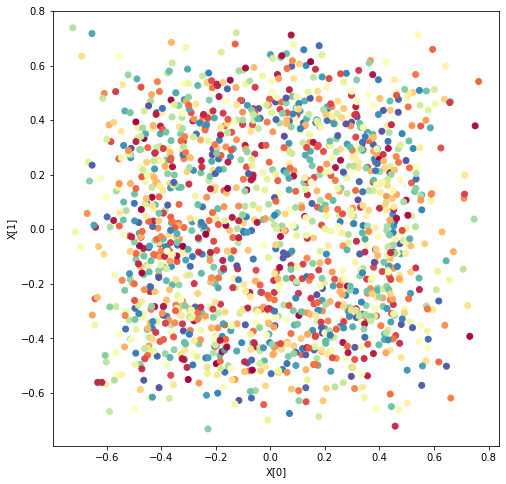

In [5]:
from sklearn.manifold import MDS

# n_components = 2 indicates that we want to unroll the non-linear data from 3d to 2d space
# metric = False - Non-metric; non-parametric isotonic regression where the fitted curve is not a straight line
#                  it is used when the orginal data is categorical or when only the ranking is only important but not the
#                  differences in the data
# metric = True - Metric 

mds = apply_manifold_learning(X, MDS(n_components=2, metric=False))

Observations:
- No clear separation of data (all mixed up)
- For our swiss data this MDS technique did not work well

New shape of X:  (1500, 2)
Sample X:

              0          1
632   -0.399100   6.279877
1365   0.356759   3.701275
237    9.669536  -4.921408
1102  14.148134   8.579062
1295  -0.099148   2.019601
401    9.777437   9.729071
1121  -6.305613   3.076672
1389  -2.256467  11.157756
832  -13.799335  -2.840937
655    8.336990   1.609202


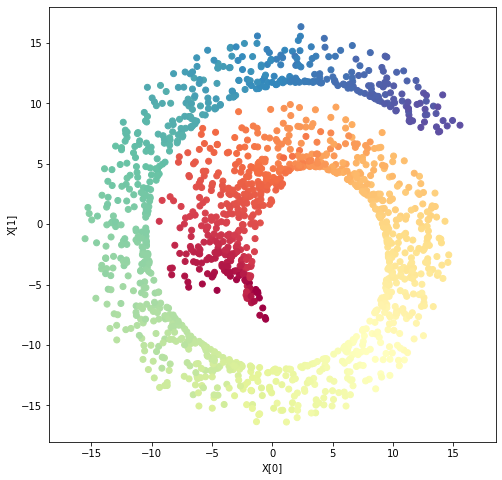

In [6]:
# metric = True - Metric; It is used when the data is in the form of coordinates where the distance between points is 
#                         meaningful; not just ranking.

mds = apply_manifold_learning(X, MDS(n_components=2, metric=True))

<font color='red'>__Spectral Embedding__</font>
- Spectral Embedding reduces dimensionality by first forming an affinity matrix based on some algorithm. By default, this is the nearest neighbors algorithm. Once we have this affinity matrix, spectral embedding then applies spectral decomposition to reduce dimensionality in data.
- Spectral decomposition is Eigen value decomposition, which is the factorization of a matrix, which is our higher-dimensional data into a canonical form.
- This canonical form is a diagonal matrix, which makes computations on the matrix far simpler.
- Forms an affinity matrix based on the nearest neighbors algorithm by default and then applies spectral decomposition

New shape of X:  (1500, 2)
Sample X:

             0         1
1288 -0.000660 -0.002476
1238  0.001621 -0.003039
981   0.002655  0.002867
1343  0.001455 -0.003047
942   0.002297 -0.001600
1362 -0.000359 -0.002926
815   0.003646  0.000732
798  -0.001575 -0.001353
568  -0.001624  0.001763
1226 -0.002429  0.000648


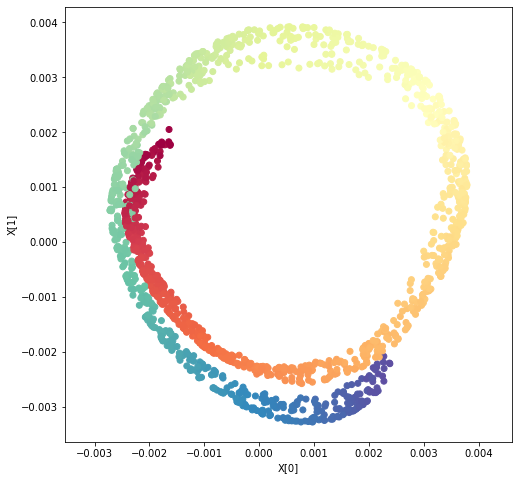

In [7]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X, SpectralEmbedding(n_components=2, random_state=0, eigen_solver='arpack'))

<font color='red'>__t-distributed Stochastic Neighbor Embedding (t-SNE)__</font>
- Reduces dimensionality by keeping __similar instances <font color=red>close</font>__ and __dissimilar instances <font color=red>apart</font>__
- Uses the Euclidean distance between points as a measure of similarity but can be configured through 'init' parameter
- One disadvantage is that with different values of initialization parameter, it gives a different result.
- If your data has high dimensions, you may need to use another dimensionality reduction technique to reduce the features first before applying t-SNE.

New shape of X:  (1500, 2)
Sample X:

              0          1
646   -3.177443  17.883217
612   -4.875906  14.627172
86   -26.659342  22.910898
116  -25.833941  -8.582968
1469  -0.023554 -44.336956
968    1.287745  32.121368
407   30.064819   6.556016
804    9.610990 -28.473183
537   16.780478  27.007395
465   -4.376469 -40.389400


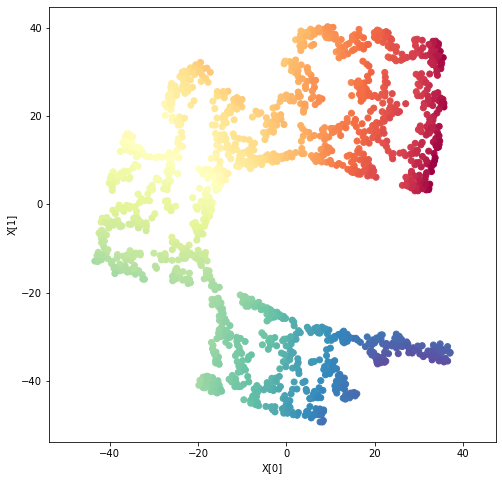

In [8]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(X, TSNE(n_components=2, init='pca', random_state=0))

<font color='red'>__Isomap__</font>
- It works by creating a map where every instance is connected to its neighbors and then it reduces dimensionality while trying to preserve the geodesic distances between an instance and all its neighbors. The number of neighbors that a particular instance is connected to is something that we specify.
- Creates a map connecting each instance to its neighbors then reduces dimensionality while trying to preserve the geodesic distances.
- Geodesic distances are basically the shortest path between two points on a curved surface, such as the Earth or a ball.

New shape of X:  (1500, 2)
Sample X:

              0         1
1382  -3.612647 -5.559726
14   -17.248154  2.624290
147  -34.712123 -2.953691
486  -34.039916  7.430648
392  -21.214869 -7.065080
406   -0.317293  2.202208
194  -36.319095  8.631438
1154 -29.435177  7.078899
803  -32.327582  0.422120
1027   4.740464  9.689811


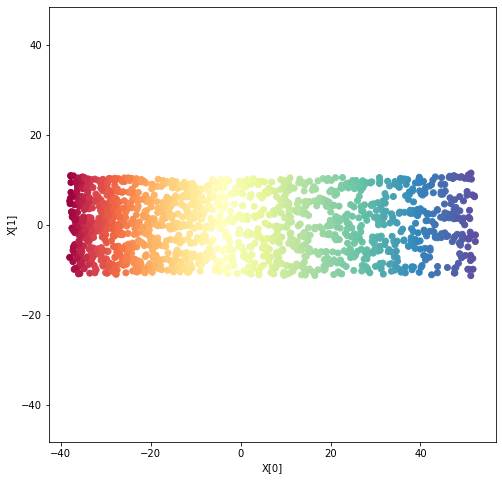

In [9]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, Isomap(n_neighbors=15, n_components=2))

<font color='red'>__Locally Linear Embedding__</font>
- Measures how __each training instance__ relates to its __closest neighbors__ and then tries to find a lower dimensional representation that __preserves__ these __local relationships__

New shape of X:  (1500, 2)
Sample X:

             0         1
589  -0.021026 -0.010688
1477 -0.003302 -0.020188
666  -0.003297 -0.002900
1243 -0.022537 -0.044858
904  -0.031883 -0.027307
393  -0.033693  0.042674
170   0.034490  0.021960
20    0.047968  0.018727
214   0.019668  0.006649
13   -0.028482  0.030199


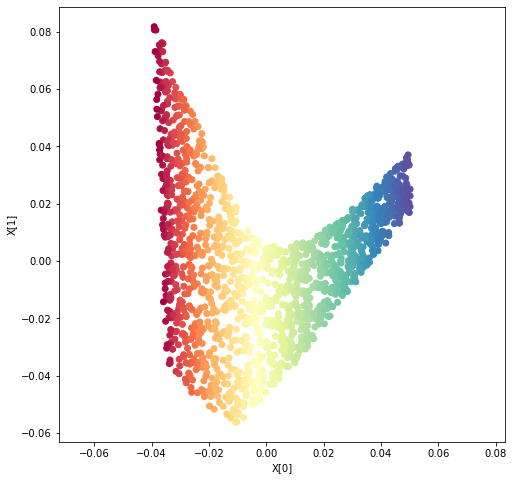

In [10]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, LocallyLinearEmbedding(n_neighbors=15, n_components=2, method='standard'))

Observations:
- Perfect rectangle is what is desired but got distorted in the 'standard' method, so we change the method.

New shape of X:  (1500, 2)
Sample X:

             0         1
322  -0.028172 -0.043766
1255  0.022020 -0.041463
1234  0.028286 -0.026727
1178 -0.032839 -0.025168
639   0.010098  0.011724
633  -0.033005  0.017764
600   0.002358 -0.021269
1124 -0.013069  0.007258
1284  0.029454  0.024886
1185 -0.021114 -0.033403


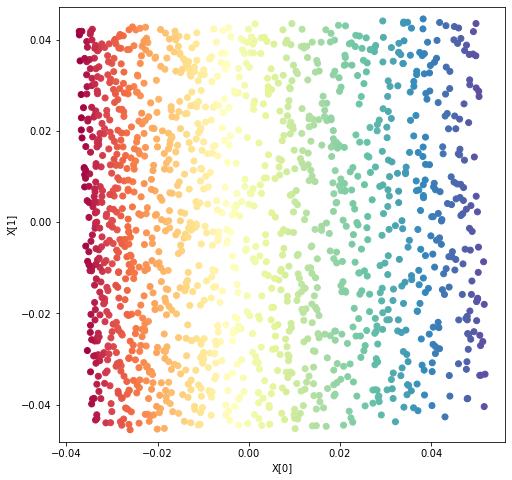

In [11]:
lle = apply_manifold_learning(X, LocallyLinearEmbedding(n_neighbors=15, n_components=2, method='modified'))

New shape of X:  (1500, 2)
Sample X:

             0         1
1179  0.039478  0.035697
1099 -0.022011  0.017104
1060 -0.013110 -0.025495
305   0.012034 -0.019276
606  -0.034099  0.026158
1350 -0.024737 -0.027486
506  -0.013860 -0.013673
169  -0.012327  0.027876
788  -0.024545  0.016822
1439 -0.034146  0.005403


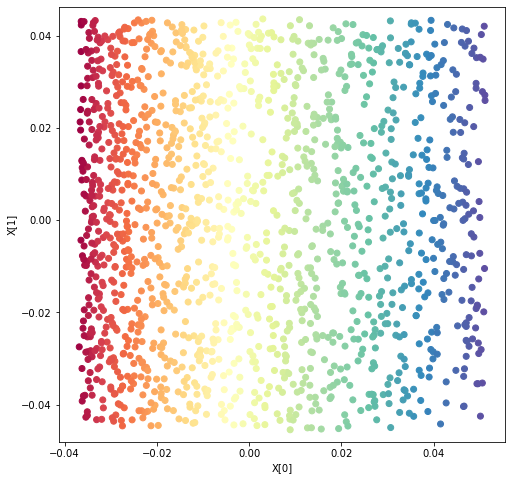

In [12]:
# Tweaks the original numerical procedure that were used for 'standard' LLE to yield better results.
# Hessian LLE is far more complex to compute
# 'modified LLE' is simpler in computation when compared with 'hessian LLE'

lle = apply_manifold_learning(X, LocallyLinearEmbedding(n_neighbors=15, n_components=2, method='hessian'))

<font color='red'>__kernel PCA__</font>
- It reduces complexity of non-inear data by mapping it to a __higher dimensional feature space__. So it increases number of dimensions to reduce complexity. 
- It uses a kernel trick to map data to higher dimensionality.
- Data which originally was separated using a non-linear decision boundary in the orignal feature space can now be separated linearly in the higher dimensional space.

In [13]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

In [14]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=0.3, noise=0.05)

In [15]:
X.shape

(400, 2)

In [16]:
pd.DataFrame(X).sample(10)

,0,1
322,-0.941952,-0.216752
399,-0.144968,-0.234449
84,0.765889,-0.658075
165,0.539309,-0.850308
108,0.268472,-0.151862
392,-0.378544,-0.031536
210,1.017616,-0.166718
134,0.903368,-0.464260
110,-0.387642,0.936167
89,0.093765,0.295981


In [17]:
# y holds the label data or categories

y.shape

(400,)

In [18]:
# There are two concentric circles and y refers one of the circles

pd.DataFrame(y).sample(10)

,0
281,1
140,1
133,0
375,0
51,1
57,1
54,0
34,0
22,1
239,0


Text(0, 0.5, 'X[1]')

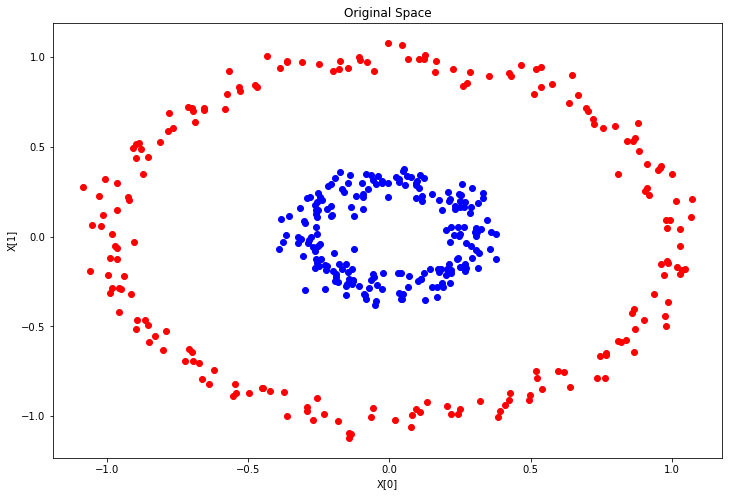

In [19]:
# Plot original data

pl.figure(figsize=(12, 8))
pl.title('Original Space')

pl.plot(X[y==0, 0], X[y==0, 1], 'ro')
pl.plot(X[y==1, 0], X[y==1, 1], 'bo')

plt.xlabel('X[0]')
plt.ylabel('X[1]')

In [20]:
# Regular PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [21]:
X_new = pca.fit_transform(X)

In [22]:
print('Explained Variance: ', pca.explained_variance_ratio_)

Explained Variance:  [0.50075625 0.49924375]


Text(0, 0.5, 'X[1]')

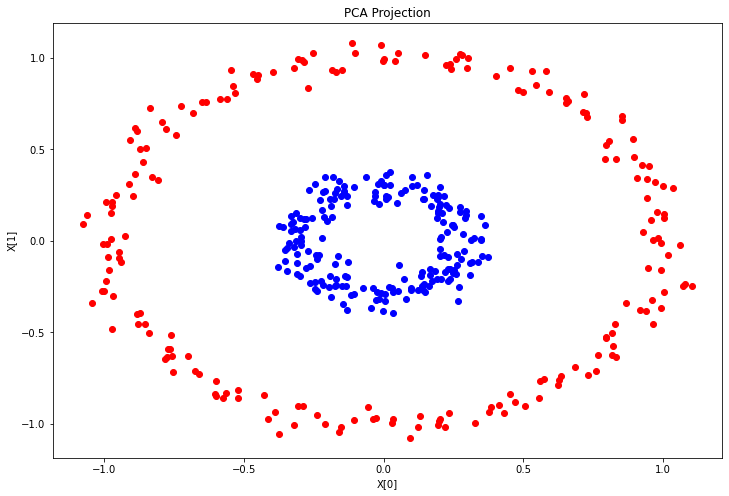

In [23]:
# Plot 'regular PCA' transformed data

pl.figure(figsize=(12, 8))
pl.title('PCA Projection')

pl.plot(X_new[y==0, 0], X_new[y==0, 1], 'ro')
pl.plot(X_new[y==1, 0], X_new[y==1, 1], 'bo')

plt.xlabel('X[0]')
plt.ylabel('X[1]')

Observations:
- We notice that there is no change even after applying the __regular PCA__ and so is the need for __kernel PCA__
- <font color=red>Kernel PCA</font>: Uses the kernel trick - a mathematical technique that maps instances to a very __high dimensionality feature space__ to make it easier to cluster instances.

In [24]:
from sklearn.decomposition import KernelPCA

In [25]:
kcpa = KernelPCA(kernel='rbf', gamma=3)

In [26]:
X_new = kcpa.fit_transform(X)

In [27]:
X_new.shape

(400, 373)

In [28]:
# Notice we've 358 features now as shown by the shape of X_new

pd.DataFrame(X_new).sample(10)

,0,1,2,3,4,5,6,7,8,9,...,363,364,365,366,367,368,369,370,371,372
94,0.458892,0.146575,0.393403,-0.068191,-0.025348,-0.161375,0.250887,0.014340,-0.021348,-0.002379,...,-3.626421e-10,2.109788e-10,1.368729e-10,3.807039e-10,-2.138802e-10,1.770966e-10,2.503351e-10,-2.773123e-10,-6.782164e-11,2.405387e-12
105,-0.397468,0.055198,-0.433229,-0.052758,-0.463022,-0.037707,0.351513,0.322962,0.209025,0.251238,...,-1.352200e-11,-8.903546e-11,3.272217e-12,-4.003634e-11,9.518294e-11,3.983230e-11,3.058178e-11,-3.518082e-11,2.519583e-11,4.223042e-11
369,-0.399605,0.024158,0.435318,-0.214110,-0.433192,0.083839,-0.312909,-0.102970,-0.386929,0.035302,...,-3.012135e-11,-3.149992e-11,3.245957e-11,-9.639699e-12,-1.011081e-10,8.003205e-12,1.559150e-11,-6.626556e-11,3.436213e-11,-1.585778e-11
91,0.335419,0.455769,0.268624,-0.082643,0.109261,-0.297616,0.093355,0.021353,0.031242,0.014183,...,2.324592e-10,5.780989e-10,-3.361455e-10,1.123002e-10,-9.659172e-11,1.530203e-10,-1.769841e-10,-3.691270e-10,5.359867e-11,8.392269e-11
76,0.412819,-0.231496,0.404219,0.049357,-0.074708,0.087338,0.307641,-0.021542,0.009316,0.000518,...,-3.717708e-10,-8.598454e-11,4.203958e-10,-2.593235e-10,3.116415e-10,-2.506940e-10,-9.473777e-11,-1.503366e-10,-9.845547e-12,1.565725e-10
377,-0.404912,-0.384412,-0.149748,-0.188212,0.451918,-0.317540,0.035886,-0.030176,-0.391507,0.251737,...,1.792816e-11,7.994137e-12,-5.251697e-11,-1.691368e-12,1.317936e-11,-6.962752e-11,-2.799710e-11,-2.462964e-11,-3.855179e-11,1.323933e-11
272,0.275964,-0.262754,-0.486500,-0.153426,-0.055664,0.170547,-0.244510,-0.054693,0.051688,-0.022784,...,-9.583832e-11,7.498425e-11,-5.226225e-11,-5.858622e-11,3.575882e-11,8.926030e-11,1.101239e-10,5.365832e-11,3.506102e-11,5.881849e-11
57,0.455328,-0.104116,-0.405944,-0.046471,-0.064744,0.115121,-0.274458,-0.006037,0.028683,-0.004688,...,-5.180181e-11,3.036674e-10,-1.091235e-10,-3.699942e-12,1.308978e-10,2.235975e-10,1.540237e-12,-8.284840e-11,1.338740e-10,4.106957e-11
260,-0.412553,-0.108361,-0.383218,-0.366898,-0.287911,-0.186722,0.311576,-0.092132,0.367244,-0.123689,...,4.239457e-12,-2.816314e-12,-1.824211e-12,-3.002449e-12,-2.560066e-12,3.298218e-12,2.454177e-12,5.177446e-12,1.835265e-12,3.951829e-13
103,0.383280,-0.010984,-0.485175,-0.031081,-0.113502,0.055808,-0.311797,0.014145,0.039305,0.000175,...,2.402332e-10,9.170804e-11,-2.432516e-10,1.495544e-10,2.613764e-10,-5.082998e-11,-4.154555e-11,1.719802e-10,-6.274664e-11,1.158096e-10


Text(0, 0.5, 'X[1]')

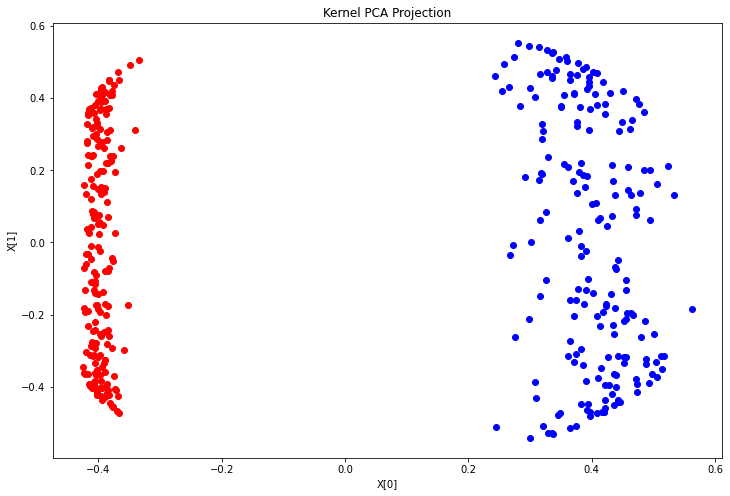

In [29]:
# Plot 'kernel PCA' transformed data
# Notice the linear decision boundary separated in higher dimension

pl.figure(figsize=(12, 8))
pl.title('Kernel PCA Projection')

pl.plot(X_new[y==0, 0], X_new[y==0, 1], 'ro')
pl.plot(X_new[y==1, 0], X_new[y==1, 1], 'bo')

plt.xlabel('X[0]')
plt.ylabel('X[1]')